In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"


In [6]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [7]:
df=pd.read_csv(url,names=['sepal length','sepal width','petal length','petal width','target'])

In [9]:
from sklearn.preprocessing import StandardScaler


In [29]:
features=df.columns[:-1]

In [30]:
features

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [31]:
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [37]:
x_data=df[features].values

In [38]:
x_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [39]:
x=StandardScaler().fit_transform(x_data)

In [41]:
y=df[['target']].values

In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(x_data)

In [46]:
pca_df=pd.DataFrame(data=pca_data,columns=['PCA1','PCA2'])

In [47]:
pca_df

,PCA1,PCA2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


In [48]:
final_data=pd.concat([pca_df,df[['target']]],axis=1)

In [49]:
final_data

,PCA1,PCA2,target
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


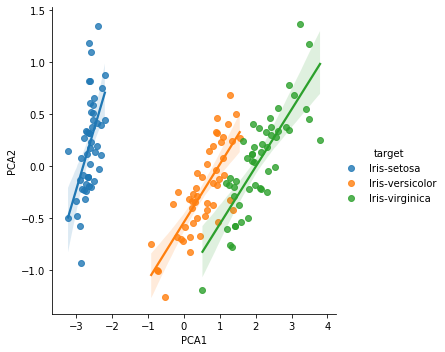

In [58]:
sns.lmplot('PCA1','PCA2',data=final_data,hue='target')